In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("/home/anisha/Desktop/ECG/site/Testdata.csv", delimiter='\t')

In [4]:
import matplotlib.pyplot as plt

In [5]:
data_raw=data.iloc[:,0]

In [6]:
data_raw.head()

0   -0.073913
1   -0.073913
2   -0.086192
3   -0.059332
4   -0.046285
Name: -0.06930838757094358, dtype: float64

Text(0.5, 1.0, 'Sample raw signal')

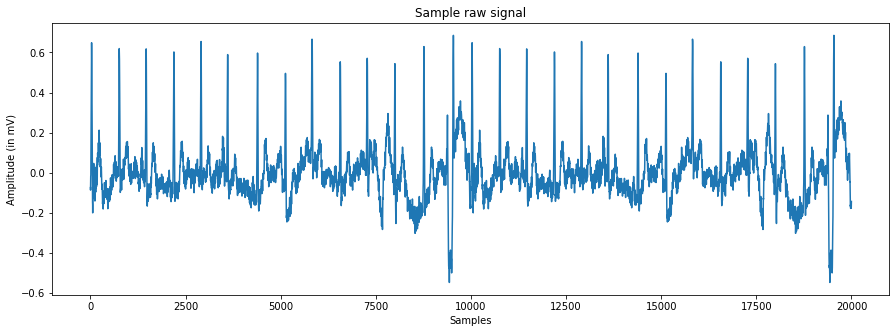

In [7]:
plt.figure(figsize=(15,5))
plt.plot(data_raw[1:100000])
plt.xlabel('Samples')
plt.ylabel('Amplitude (in mV)')
plt.title('Sample raw signal')


In [8]:
from biosppy.signals import ecg

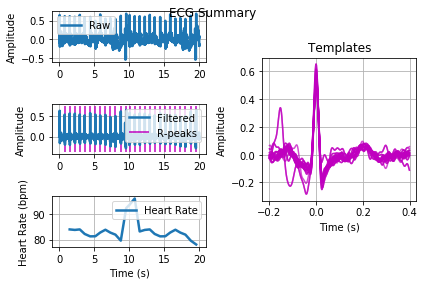

In [9]:
out = ecg.ecg(signal=data_raw, show=True, sampling_rate=1000)

In [10]:
import biosppy


In [11]:
r_peak=biosppy.signals.ecg.christov_segmenter(signal=data_raw, sampling_rate=1000)[0]

/home/anisha/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [12]:
print(r_peak)
r_list=r_peak

[   30  1433  2847  4308  5733  7132  8702 10168 11569 13056 14468 15922
 17448 18982 19981 21433 22847 24308 25733 27132 28702 30168 31569 33056
 34468 35922 37448 38982]


In [13]:
print(r_list)
r_new=r_list[0:1]
print(r_new)

[   30  1433  2847  4308  5733  7132  8702 10168 11569 13056 14468 15922
 17448 18982 19981 21433 22847 24308 25733 27132 28702 30168 31569 33056
 34468 35922 37448 38982]
[30]


In [14]:
import numpy as np
data_fin = np.array(data_raw)
signals = []
count = 1
peaks =  biosppy.signals.ecg.christov_segmenter(signal=data_fin, sampling_rate = 1000)[0]
print(peaks)
def segment(signal_MLII, beat_loc):
    window=180
    count=1
    x=beat_loc-window
    y=beat_loc+window
    print(x, y)
    samp=signal_MLII[x:y]
    '''for i in ann_Sample[2,-2]:
            x=ann_Sample[i]-window
            y=ann_sample[i]+window
            samp=temp[x:y]
            
    return samp'''
    return samp
for i in peaks:
    segmentation=segment(data_fin, i)
    if len(segmentation)==360:
        signals.append(segmentation)


[   30   754  1463  2193  2907  3606  4392  5123  5823  6565  7273  8001
  8764  9538 10030 10754 11463 12193 12907 13606 14392 15123 15823 16565
 17273 18001 18764 19538]
-150 210
574 934
1283 1643
2013 2373
2727 3087
3426 3786
4212 4572
4943 5303
5643 6003
6385 6745
7093 7453
7821 8181
8584 8944
9358 9718
9850 10210
10574 10934
11283 11643
12013 12373
12727 13087
13426 13786
14212 14572
14943 15303
15643 16003
16385 16745
17093 17453
17821 18181
18584 18944
19358 19718


In [15]:
len(signals)

27

In [16]:
sig=signals[0]

In [17]:
print(sig)

[-4.55177612e-02 -5.01223986e-02 -6.16339920e-02 -6.77735085e-02
 -6.93083876e-02 -6.93083876e-02 -6.93083876e-02 -6.47037502e-02
 -5.85642337e-02 -5.31921568e-02 -4.62852008e-02 -4.09131239e-02
 -3.40061678e-02 -3.32387283e-02 -2.78666513e-02 -2.86340909e-02
 -3.24712887e-02 -4.09131239e-02 -4.55177612e-02 -5.70293546e-02
 -5.70293546e-02 -6.39363107e-02 -6.24014315e-02 -6.85409480e-02
 -6.93083876e-02 -6.24014315e-02 -5.39595964e-02 -4.47503217e-02
 -3.17038491e-02 -1.48201788e-02  4.36581017e-03  1.66448431e-02
  2.89238761e-02  3.27610739e-02  3.96680299e-02  4.19703486e-02
  3.35285134e-02  2.89238761e-02  1.81797222e-02  9.73788709e-03
  4.36581017e-03 -6.37834367e-03 -9.44810191e-03 -1.32852997e-02
 -1.09829810e-02 -9.44810191e-03 -8.68066235e-03  2.83093105e-03
  8.20300797e-03  1.81797222e-02  2.73889970e-02  3.89005904e-02
  4.65749860e-02  5.34819420e-02  5.34819420e-02  5.27145024e-02
  4.96447442e-02  5.27145024e-02  5.04121838e-02  4.88773046e-02
  4.58075464e-02  4.19703

Text(0.5, 1.0, 'Beat Segmentation of raw ECG after R peak detection')

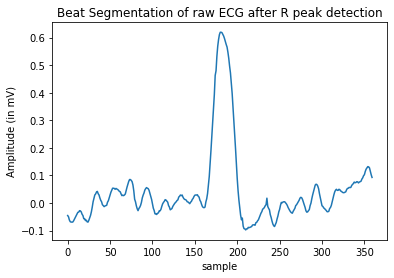

In [18]:
plt.plot(sig)
plt.xlabel('sample')
plt.ylabel('Amplitude (in mV)')
plt.title('Beat Segmentation of raw ECG after R peak detection')


In [29]:
from keras.models import load_model

Using TensorFlow backend.


In [30]:
#load model
model=load_model('/home/anisha/Desktop/ECG/site/my_model.h5')
print('model loaded')

ValueError: Unknown initializer: GlorotUniform